# View the result of many simulations

In [1]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from scipy.interpolate import interp1d

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
#import seaborn as sns

In [5]:
#import statsmodels
#from scipy.stats.stats import pearsonr
#from sklearn.metrics import matthews_corrcoef

In [6]:
#dir(matthews_corrcoef)

# config LSST

In [7]:
all_filternum = {'u':1, 'g':2, 'r':3, 'i':4, 'z':5, 'y':6}
all_filtercolors = {'u':'b', 'g':'g', 'r':'r', 'i':'y', 'z':'grey', 'y':'k'}
all_filtername= ['u','g','r','i','z','y']

In [8]:
NBFILT=len(all_filternum)

# Input Data

In [9]:
path_data="/sps/lsst/data/PCWG_MiniDataChallenge/pickles_uvk/2018-07-08/"

In [10]:
dirs = os.listdir(path_data)

In [11]:
selected_files = []
for thefile in dirs:
    if thefile.find("info")!=-1:
        selected_files.append(thefile)

In [12]:
selected_files.sort()


In [13]:
#selected_files

In [14]:
all_data = []
for thefile in selected_files:
    thefullfilename=os.path.join(path_data,thefile)
    data=np.loadtxt(thefullfilename)
    all_data.append(data)

In [15]:
all_data[0].shape

(912, 8)

In [16]:
sed_idx=0

In [17]:
data=all_data[0]

# data field
| airmass    |    filter(1..6)  |  vaod   |  o3   |   pwv  |   clouds    |    instrum-mag (ADU) |       error-mag |

In [18]:
df=pd.DataFrame(data)

In [19]:
df.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cac862550>]], dtype=object)

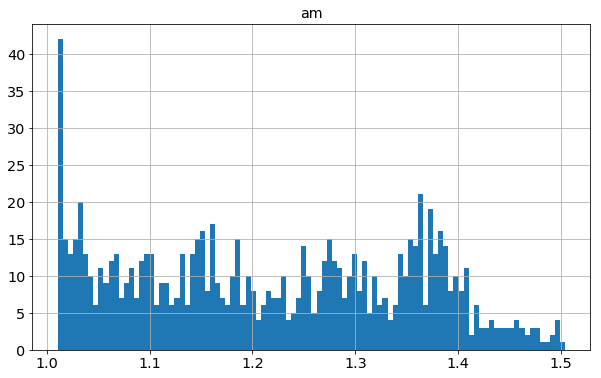

In [20]:
df.hist("am",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca28f26d8>]], dtype=object)

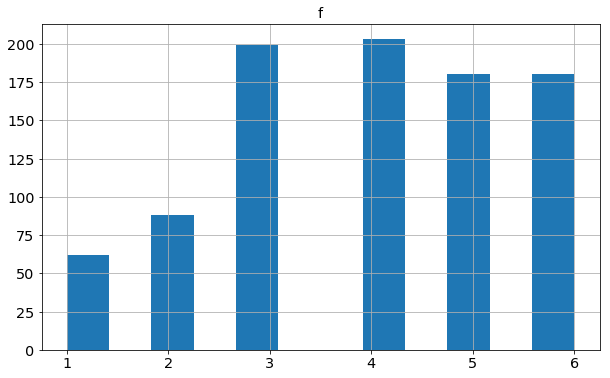

In [21]:
df.hist("f",bins=12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7caf03f898>]], dtype=object)

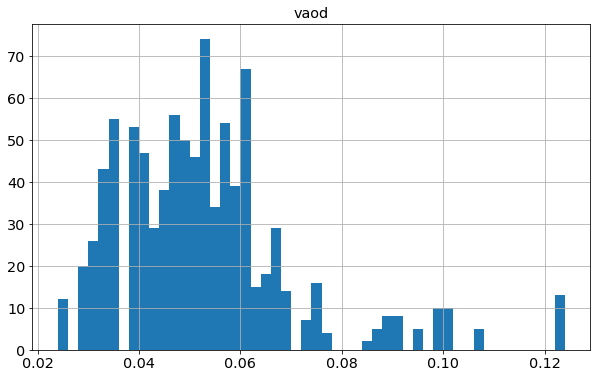

In [22]:
df.hist('vaod',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca006aa20>]], dtype=object)

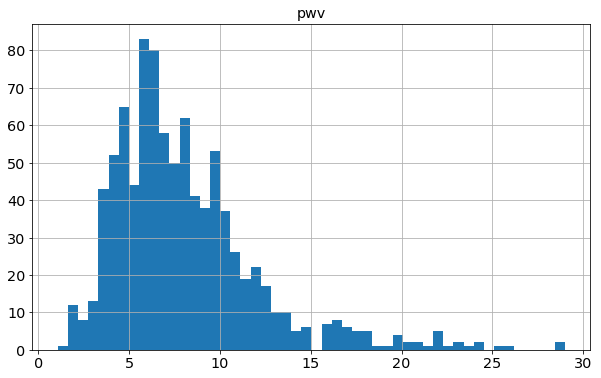

In [23]:
df.hist('pwv',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c79000748>]], dtype=object)

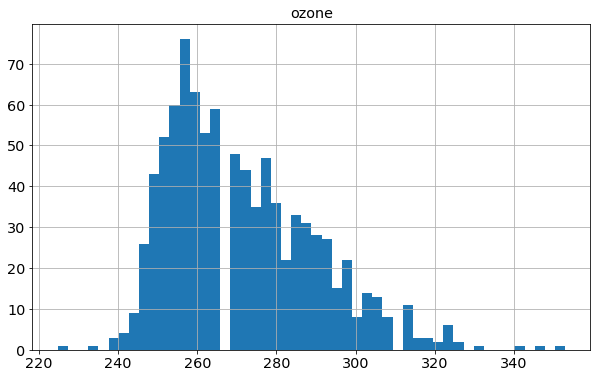

In [24]:
df.hist('ozone',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c78f08400>]], dtype=object)

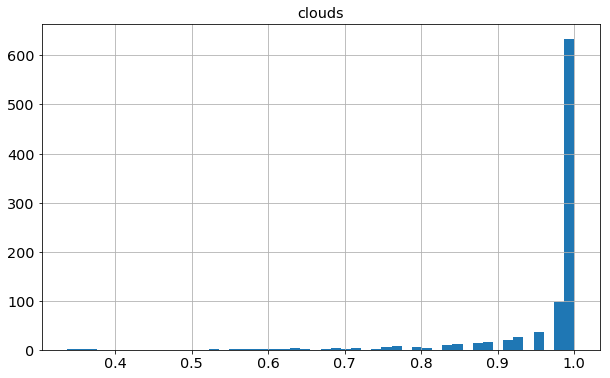

In [25]:
df.hist('clouds',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c78ca0080>]], dtype=object)

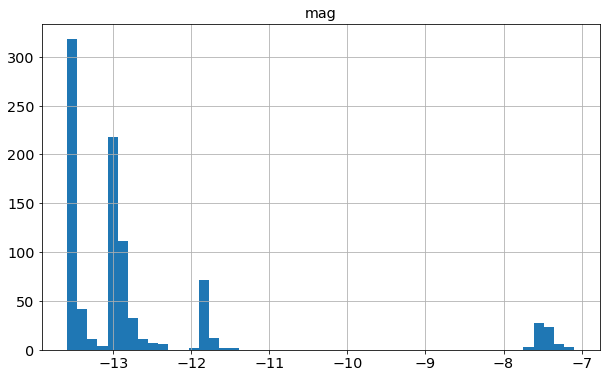

In [26]:
df.hist('mag',bins=50)

In [27]:
#df.plot.scatter(x='mag',y='magerr',grid=True)

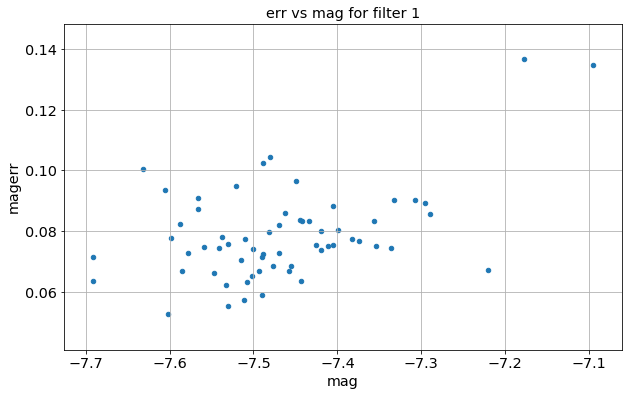

In [28]:
df.loc[(df.f == 1) & (df.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)

In [29]:
len(all_data)

12961

In [30]:
NBSED=len(all_data)

# Concatenate All Data Samples

In [31]:
MAG_CUT=[-9.,-13.,-13.,-13.,-13.,-13.,-13.]

In [32]:
all_df = []
for ised in np.arange(NBSED):
    df2=pd.DataFrame(all_data[ised])
    df2.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']
    all_df.append(df2)   
    #df2.loc[(df2.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)
dft=pd.concat(all_df)


# The Most bright sources

In [33]:
for ised in np.arange(NBSED):
#for ised in np.arange(10):
    thedf=pd.DataFrame(all_data[ised])
    thedf.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']
    #print(thedf)
    themag=thedf["mag"].values
    thefilt=thedf["f"].values
    all_u_idx=np.where(thefilt==1)[0]
    all_g_idx=np.where(thefilt==2)[0]
    all_r_idx=np.where(thefilt==3)[0]
    all_i_idx=np.where(thefilt==4)[0]
    all_z_idx=np.where(thefilt==5)[0]
    all_y_idx=np.where(thefilt==6)[0]
    themax_u=themag[all_u_idx].max()
    themax_g=themag[all_g_idx].max()
    themax_r=themag[all_r_idx].max()
    themax_i=themag[all_i_idx].max()
    themax_z=themag[all_z_idx].max()
    themax_y=themag[all_y_idx].max()
    if  themax_u<MAG_CUT[0] and themax_g<MAG_CUT[1] and themax_r<MAG_CUT[2] and themax_i<MAG_CUT[3] and themax_z<MAG_CUT[4] and themax_y<MAG_CUT[5]: 
        print(ised,themax_u,themax_g,themax_r,themax_i,themax_z,themax_y)

2113 -9.1861 -13.42631 -14.35726 -14.05523 -14.28188 -13.12801


In [34]:
thedf=pd.DataFrame(all_data[2113])
thedf.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

In [35]:
thedf.head()

,am,f,vaod,ozone,pwv,clouds,mag,magerr
0,1.3710,2.0,0.024,265.664,2.823,0.638,-13.42631,0.00524
1,1.2740,2.0,0.051,249.295,4.568,1.000,-13.89871,0.00515
2,1.0251,5.0,0.067,292.946,9.803,0.931,-14.95156,0.00754
3,1.0120,5.0,0.042,301.130,6.895,1.000,-15.04962,0.00753
4,1.0303,6.0,0.057,284.761,3.405,1.000,-14.38180,0.00758


## In U filter
## -------------

In [36]:
thedfu=thedf.loc[(thedf.f == 1)].drop('f', axis=1)

In [37]:
theX=thedfu["vaod"].values
theY=thedfu["mag"].values
theEY=thedfu["magerr"].values
thedfu.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.044593,0.009842,0.051608,-0.037987,0.569934,0.462429
vaod,0.044593,1.000000,-0.052936,-0.293093,-0.258506,0.509953,0.416830
ozone,0.009842,-0.052936,1.000000,0.233625,0.065933,-0.047268,-0.181478
pwv,0.051608,-0.293093,0.233625,1.000000,0.298937,-0.287937,-0.249807
clouds,-0.037987,-0.258506,0.065933,0.298937,1.000000,-0.751991,-0.611196
mag,0.569934,0.509953,-0.047268,-0.287937,-0.751991,1.000000,0.789814
magerr,0.462429,0.416830,-0.181478,-0.249807,-0.611196,0.789814,1.000000


In [38]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

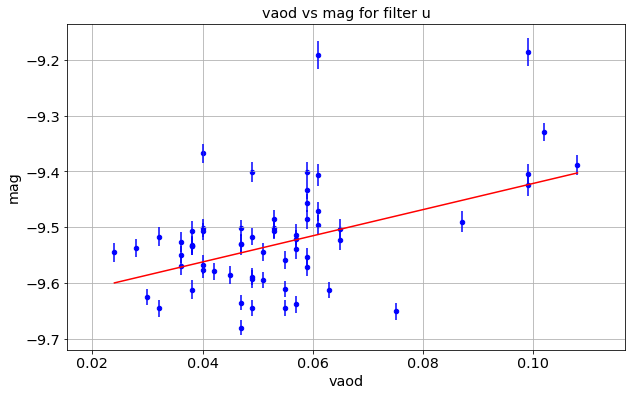

In [39]:
thedfu.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [40]:
#print(theCov)

In [41]:
corr=thedfu.loc[(thedf.f == 1) ].corr()

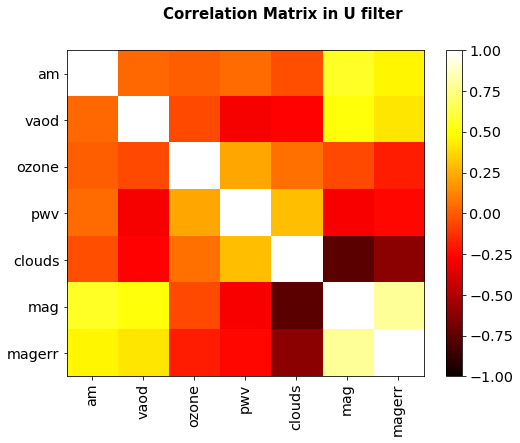

In [42]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in U filter', fontsize=15, fontweight='bold')
plt.show()

In [101]:
theX=thedfu["clouds"].values
theY=thedfu["mag"].values
theEY=thedfu["magerr"].values
thedfu.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.044593,0.009842,0.051608,-0.037987,0.569934,0.462429
vaod,0.044593,1.000000,-0.052936,-0.293093,-0.258506,0.509953,0.416830
ozone,0.009842,-0.052936,1.000000,0.233625,0.065933,-0.047268,-0.181478
pwv,0.051608,-0.293093,0.233625,1.000000,0.298937,-0.287937,-0.249807
clouds,-0.037987,-0.258506,0.065933,0.298937,1.000000,-0.751991,-0.611196
mag,0.569934,0.509953,-0.047268,-0.287937,-0.751991,1.000000,0.789814
magerr,0.462429,0.416830,-0.181478,-0.249807,-0.611196,0.789814,1.000000


In [102]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

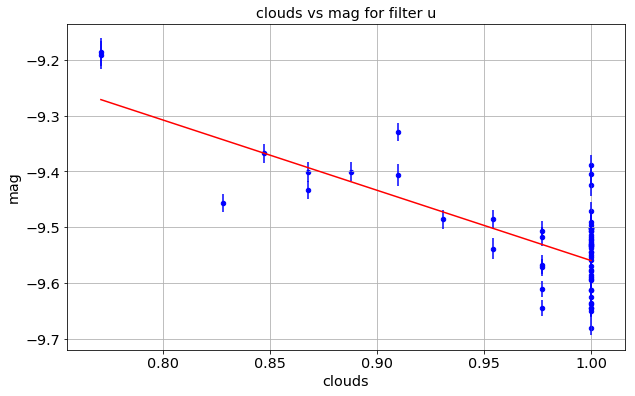

In [103]:
thedfu.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## The G filter
## -------------

In [43]:
thedfg=thedf.loc[(thedf.f == 2)].drop('f', axis=1)

In [44]:
theX=thedfg["vaod"].values
theY=thedfg["mag"].values
theEY=thedfg["magerr"].values
thedfg.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.105253,-0.210352,-0.025283,-0.150441,0.416264,0.024912
vaod,0.105253,1.000000,-0.205201,0.093619,0.149823,0.115132,0.064555
ozone,-0.210352,-0.205201,1.000000,-0.165570,0.116067,-0.193881,-0.133372
pwv,-0.025283,0.093619,-0.165570,1.000000,0.077158,-0.057263,0.018295
clouds,-0.150441,0.149823,0.116067,0.077158,1.000000,-0.927516,-0.358034
mag,0.416264,0.115132,-0.193881,-0.057263,-0.927516,1.000000,0.350112
magerr,0.024912,0.064555,-0.133372,0.018295,-0.358034,0.350112,1.000000


In [45]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

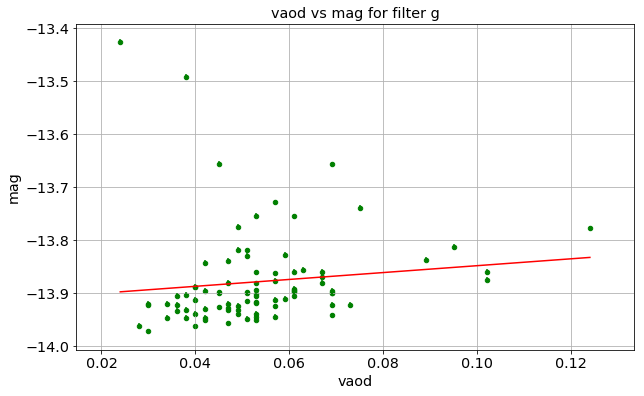

In [46]:
thedfg.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter g',color='g',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [47]:
#thedf.loc[(thedf.f == 2) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter g',color='g',marker='o',grid=True)

In [48]:
corr=thedfg.loc[(thedf.f == 2) ].corr()

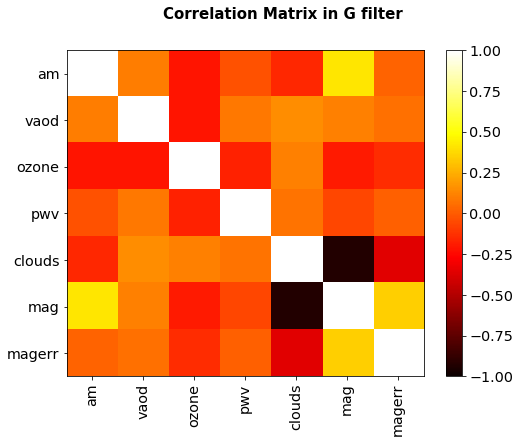

In [49]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in G filter', fontsize=15, fontweight='bold')
plt.show()

In [104]:
theX=thedfg["clouds"].values
theY=thedfg["mag"].values
theEY=thedfg["magerr"].values
thedfg.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.105253,-0.210352,-0.025283,-0.150441,0.416264,0.024912
vaod,0.105253,1.000000,-0.205201,0.093619,0.149823,0.115132,0.064555
ozone,-0.210352,-0.205201,1.000000,-0.165570,0.116067,-0.193881,-0.133372
pwv,-0.025283,0.093619,-0.165570,1.000000,0.077158,-0.057263,0.018295
clouds,-0.150441,0.149823,0.116067,0.077158,1.000000,-0.927516,-0.358034
mag,0.416264,0.115132,-0.193881,-0.057263,-0.927516,1.000000,0.350112
magerr,0.024912,0.064555,-0.133372,0.018295,-0.358034,0.350112,1.000000


In [106]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

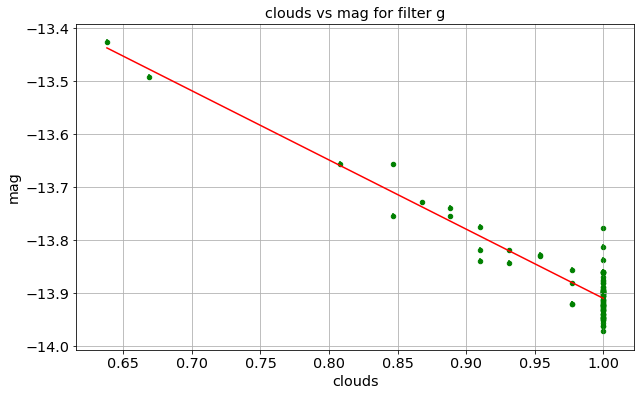

In [107]:
thedfg.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter g',color='g',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## The R filter
## -----------

In [50]:
thedfr=thedf.loc[(thedf.f == 3)].drop('f', axis=1)

In [51]:
theX=thedfr["vaod"].values
theY=thedfr["mag"].values
theEY=thedfr["magerr"].values
thedfr.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.098140,-0.010069,-0.054870,0.068295,0.080880,0.250333
vaod,0.098140,1.000000,0.093186,-0.040252,-0.059257,0.237539,0.257918
ozone,-0.010069,0.093186,1.000000,0.019234,-0.033646,0.062751,0.022423
pwv,-0.054870,-0.040252,0.019234,1.000000,-0.007075,0.014895,0.015418
clouds,0.068295,-0.059257,-0.033646,-0.007075,1.000000,-0.970444,-0.824684
mag,0.080880,0.237539,0.062751,0.014895,-0.970444,1.000000,0.886902
magerr,0.250333,0.257918,0.022423,0.015418,-0.824684,0.886902,1.000000


In [52]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

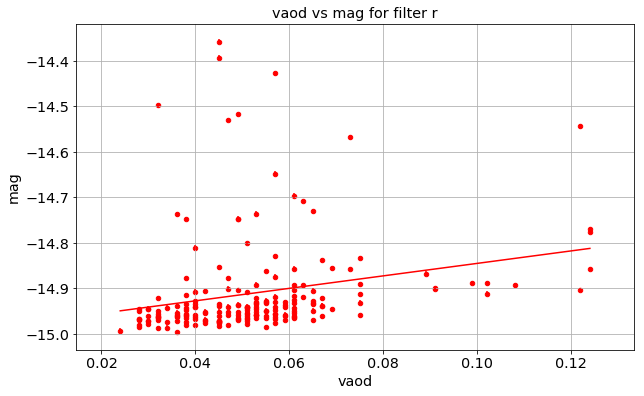

In [53]:
thedfr.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter r',color='r',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [54]:
corr=thedfr.loc[(thedf.f == 3) ].corr()

In [55]:
#thedf.loc[(thedf.f == 3) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter r',color='r',marker='o',grid=True)

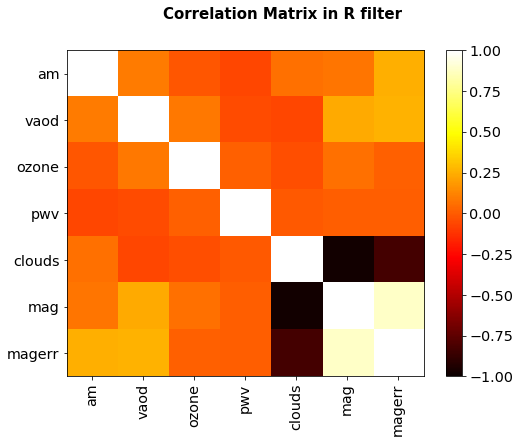

In [56]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in R filter', fontsize=15, fontweight='bold')
plt.show()

In [111]:
theX=thedfr["clouds"].values
theY=thedfr["mag"].values
theEY=thedfr["magerr"].values
thedfr.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.098140,-0.010069,-0.054870,0.068295,0.080880,0.250333
vaod,0.098140,1.000000,0.093186,-0.040252,-0.059257,0.237539,0.257918
ozone,-0.010069,0.093186,1.000000,0.019234,-0.033646,0.062751,0.022423
pwv,-0.054870,-0.040252,0.019234,1.000000,-0.007075,0.014895,0.015418
clouds,0.068295,-0.059257,-0.033646,-0.007075,1.000000,-0.970444,-0.824684
mag,0.080880,0.237539,0.062751,0.014895,-0.970444,1.000000,0.886902
magerr,0.250333,0.257918,0.022423,0.015418,-0.824684,0.886902,1.000000


In [112]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

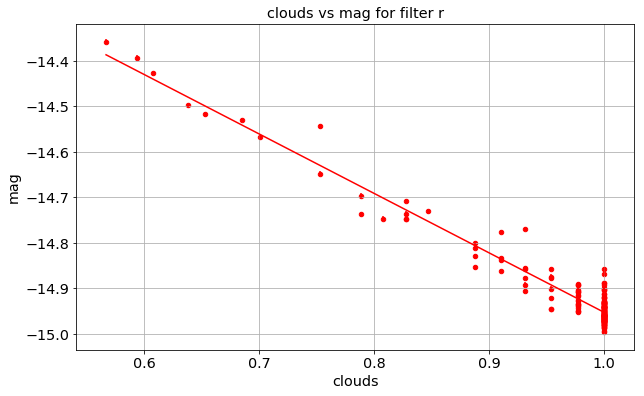

In [113]:
thedfr.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter r',color='r',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## Filter in I
## ---------------------------------

In [57]:
thedfi=thedf.loc[(thedf.f == 4)].drop('f', axis=1)

In [58]:
theX=thedfi["vaod"].values
theY=thedfi["mag"].values
theEY=thedfi["magerr"].values
thedfi.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,-0.056689,-0.063630,-0.034052,-0.046364,0.096477,0.137041
vaod,-0.056689,1.000000,-0.177914,0.015544,0.088401,0.016419,0.000867
ozone,-0.063630,-0.177914,1.000000,-0.005497,0.152186,-0.159080,-0.138723
pwv,-0.034052,0.015544,-0.005497,1.000000,0.013267,0.067801,0.106518
clouds,-0.046364,0.088401,0.152186,0.013267,1.000000,-0.977886,-0.834912
mag,0.096477,0.016419,-0.159080,0.067801,-0.977886,1.000000,0.888709
magerr,0.137041,0.000867,-0.138723,0.106518,-0.834912,0.888709,1.000000


In [59]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

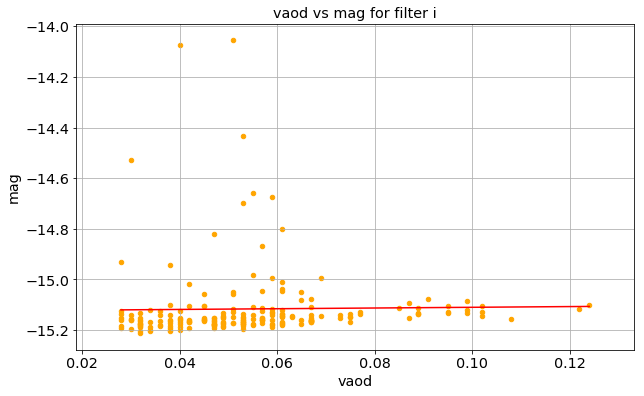

In [60]:
thedfi.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter i',color='orange',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [61]:
corr=thedfi.loc[(thedf.f == 4) ].corr()

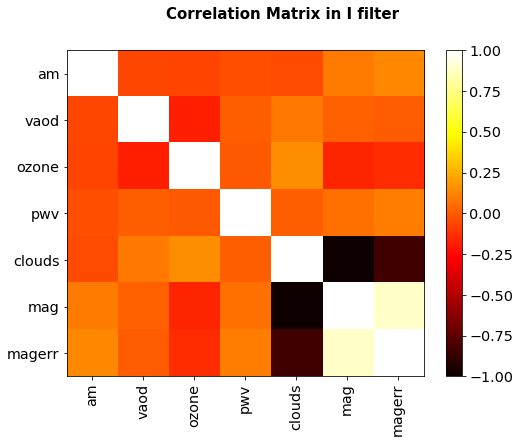

In [62]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in I filter', fontsize=15, fontweight='bold')
plt.show()

In [63]:
#thedf.loc[(thedf.f == 4) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter i',color='orange',marker='o',grid=True)

In [114]:
theX=thedfi["clouds"].values
theY=thedfi["mag"].values
theEY=thedfi["magerr"].values
thedfi.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,-0.056689,-0.063630,-0.034052,-0.046364,0.096477,0.137041
vaod,-0.056689,1.000000,-0.177914,0.015544,0.088401,0.016419,0.000867
ozone,-0.063630,-0.177914,1.000000,-0.005497,0.152186,-0.159080,-0.138723
pwv,-0.034052,0.015544,-0.005497,1.000000,0.013267,0.067801,0.106518
clouds,-0.046364,0.088401,0.152186,0.013267,1.000000,-0.977886,-0.834912
mag,0.096477,0.016419,-0.159080,0.067801,-0.977886,1.000000,0.888709
magerr,0.137041,0.000867,-0.138723,0.106518,-0.834912,0.888709,1.000000


In [115]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

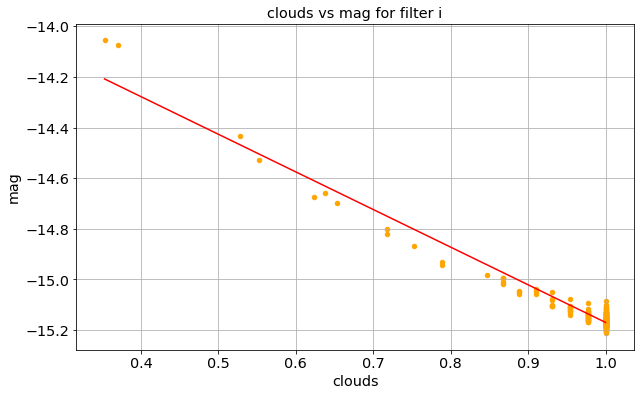

In [116]:
thedfi.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter i',color='orange',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## Filter Z
## ---------

In [64]:
thedfz=thedf.loc[(thedf.f == 5)].drop('f', axis=1)

In [65]:
theX=thedfz["vaod"].values
theY=thedfz["mag"].values
theEY=thedfz["magerr"].values
thedfz.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,-0.019138,-0.039963,0.103549,0.082314,0.040526,0.105006
vaod,-0.019138,1.000000,0.073339,-0.005418,-0.152079,0.250818,0.201029
ozone,-0.039963,0.073339,1.000000,-0.147904,-0.034428,0.006572,-0.033925
pwv,0.103549,-0.005418,-0.147904,1.000000,-0.039058,0.227819,0.091537
clouds,0.082314,-0.152079,-0.034428,-0.039058,1.000000,-0.963019,-0.552099
mag,0.040526,0.250818,0.006572,0.227819,-0.963019,1.000000,0.567307
magerr,0.105006,0.201029,-0.033925,0.091537,-0.552099,0.567307,1.000000


In [66]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

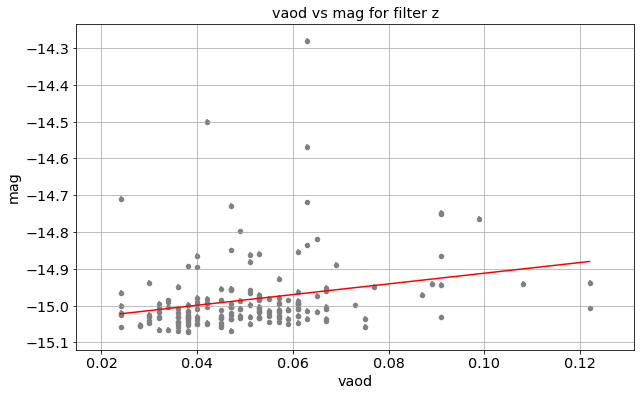

In [67]:
thedfz.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter z',color='grey',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [68]:
corr=thedfz.loc[(thedf.f == 5) ].corr()

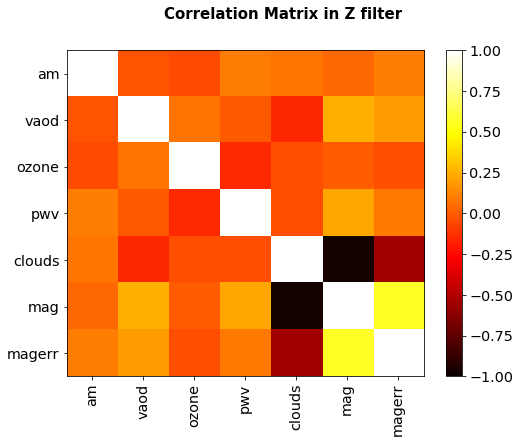

In [69]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in Z filter', fontsize=15, fontweight='bold')
plt.show()

In [70]:
#thedf.loc[(thedf.f == 5) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter z',color='grey',marker='o',grid=True)

In [117]:
theX=thedfz["clouds"].values
theY=thedfz["mag"].values
theEY=thedfz["magerr"].values
thedfz.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,-0.019138,-0.039963,0.103549,0.082314,0.040526,0.105006
vaod,-0.019138,1.000000,0.073339,-0.005418,-0.152079,0.250818,0.201029
ozone,-0.039963,0.073339,1.000000,-0.147904,-0.034428,0.006572,-0.033925
pwv,0.103549,-0.005418,-0.147904,1.000000,-0.039058,0.227819,0.091537
clouds,0.082314,-0.152079,-0.034428,-0.039058,1.000000,-0.963019,-0.552099
mag,0.040526,0.250818,0.006572,0.227819,-0.963019,1.000000,0.567307
magerr,0.105006,0.201029,-0.033925,0.091537,-0.552099,0.567307,1.000000


In [118]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

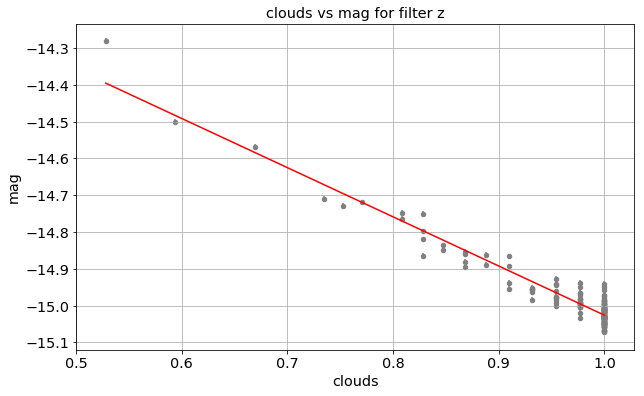

In [119]:
thedfz.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter z',color='grey',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## The Y filter

In [71]:
thedfy=thedf.loc[(thedf.f == 6)].drop('f', axis=1)

In [72]:
theX=thedfy["vaod"].values
theY=thedfy["mag"].values
theEY=thedfy["magerr"].values
thedfy.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.030070,-0.014641,0.060854,-0.100909,0.246238,0.199338
vaod,0.030070,1.000000,0.020163,-0.112451,-0.047716,0.052860,-0.014807
ozone,-0.014641,0.020163,1.000000,-0.088510,-0.102519,0.027249,0.003915
pwv,0.060854,-0.112451,-0.088510,1.000000,-0.031166,0.444551,0.242493
clouds,-0.100909,-0.047716,-0.102519,-0.031166,1.000000,-0.879376,-0.698302
mag,0.246238,0.052860,0.027249,0.444551,-0.879376,1.000000,0.787445
magerr,0.199338,-0.014807,0.003915,0.242493,-0.698302,0.787445,1.000000


In [73]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

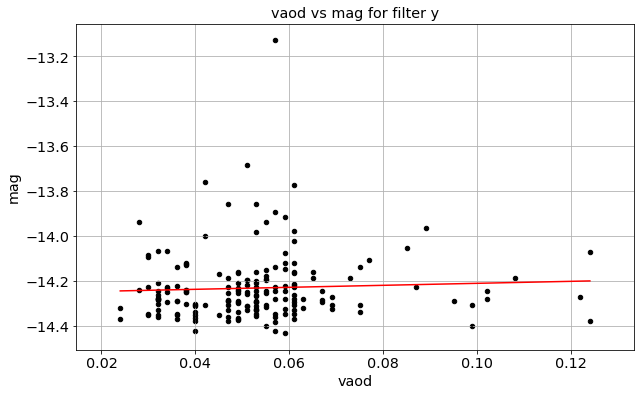

In [74]:
thedfy.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter y',color='black',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [75]:
corr=thedfy.loc[(thedf.f == 6) ].corr()

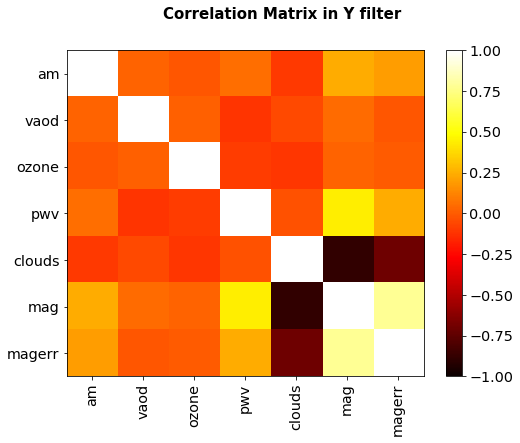

In [76]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in Y filter', fontsize=15, fontweight='bold')
plt.show()

In [77]:
#thedf.loc[(thedf.f == 6) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter y',color='black',marker='o',grid=True)

In [123]:
theX=thedfy["pwv"].values
theY=thedfy["mag"].values
theEY=thedfy["magerr"].values
thedfy.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.030070,-0.014641,0.060854,-0.100909,0.246238,0.199338
vaod,0.030070,1.000000,0.020163,-0.112451,-0.047716,0.052860,-0.014807
ozone,-0.014641,0.020163,1.000000,-0.088510,-0.102519,0.027249,0.003915
pwv,0.060854,-0.112451,-0.088510,1.000000,-0.031166,0.444551,0.242493
clouds,-0.100909,-0.047716,-0.102519,-0.031166,1.000000,-0.879376,-0.698302
mag,0.246238,0.052860,0.027249,0.444551,-0.879376,1.000000,0.787445
magerr,0.199338,-0.014807,0.003915,0.242493,-0.698302,0.787445,1.000000


In [124]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

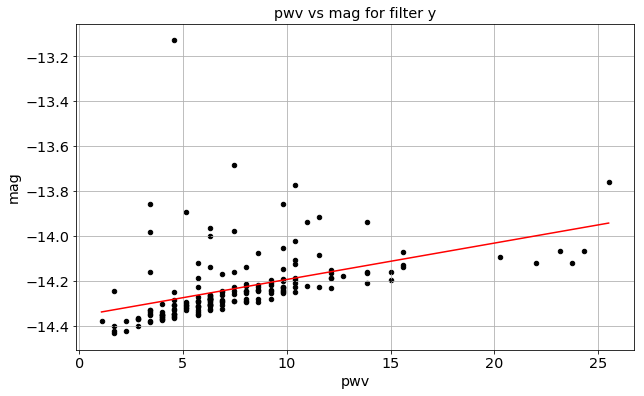

In [125]:
thedfy.plot.scatter(x='pwv',y='mag',yerr='magerr',title='pwv vs mag for filter y',color='black',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [120]:
theX=thedfy["clouds"].values
theY=thedfy["mag"].values
theEY=thedfy["magerr"].values
thedfy.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,0.030070,-0.014641,0.060854,-0.100909,0.246238,0.199338
vaod,0.030070,1.000000,0.020163,-0.112451,-0.047716,0.052860,-0.014807
ozone,-0.014641,0.020163,1.000000,-0.088510,-0.102519,0.027249,0.003915
pwv,0.060854,-0.112451,-0.088510,1.000000,-0.031166,0.444551,0.242493
clouds,-0.100909,-0.047716,-0.102519,-0.031166,1.000000,-0.879376,-0.698302
mag,0.246238,0.052860,0.027249,0.444551,-0.879376,1.000000,0.787445
magerr,0.199338,-0.014807,0.003915,0.242493,-0.698302,0.787445,1.000000


In [121]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

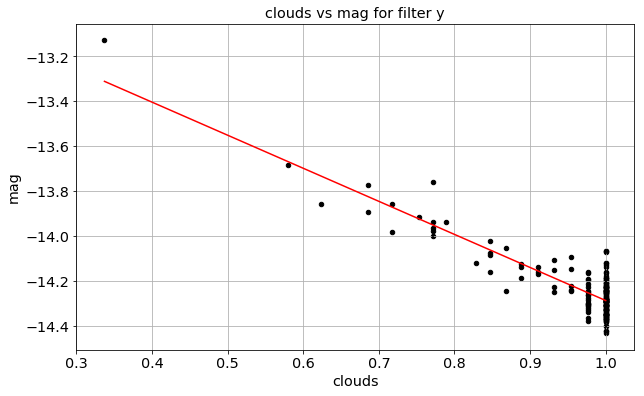

In [122]:
thedfy.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter y',color='black',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

# Plot VAOD vs Magnitude

In [81]:
thedfu=thedf.loc[(thedf.f == 1)].drop('f', axis=1)

In [82]:
dfu=dft.loc[(dft.f == 1) & (dft.mag < -11 )].drop('f', axis=1)

In [83]:
theX=dfu["vaod"].values
theY=dfu["mag"].values
theEY=dfu["magerr"].values
dfu.corr()

,am,vaod,ozone,pwv,clouds,mag,magerr
am,1.000000,-0.053865,0.028922,0.130630,0.057906,0.103058,0.192850
vaod,-0.053865,1.000000,-0.064298,-0.230865,-0.168599,0.074879,0.128671
ozone,0.028922,-0.064298,1.000000,0.186978,-0.002115,0.000101,-0.051475
pwv,0.130630,-0.230865,0.186978,1.000000,0.189733,-0.022666,-0.035064
clouds,0.057906,-0.168599,-0.002115,0.189733,1.000000,-0.100101,-0.133903
mag,0.103058,0.074879,0.000101,-0.022666,-0.100101,1.000000,0.924308
magerr,0.192850,0.128671,-0.051475,-0.035064,-0.133903,0.924308,1.000000


In [84]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

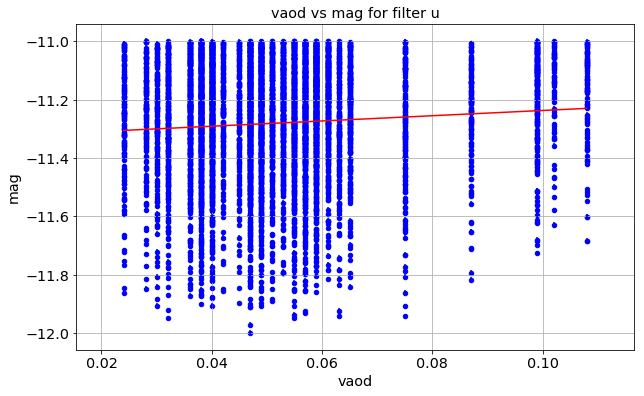

In [85]:
dfu.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [86]:
corr=dfu.loc[(thedf.f == 1) ].corr()

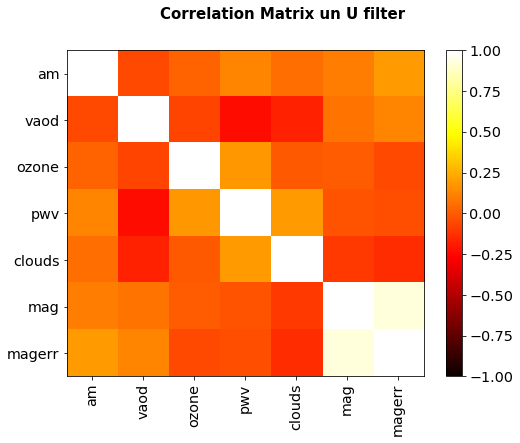

In [87]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix un U filter', fontsize=15, fontweight='bold')
plt.show()

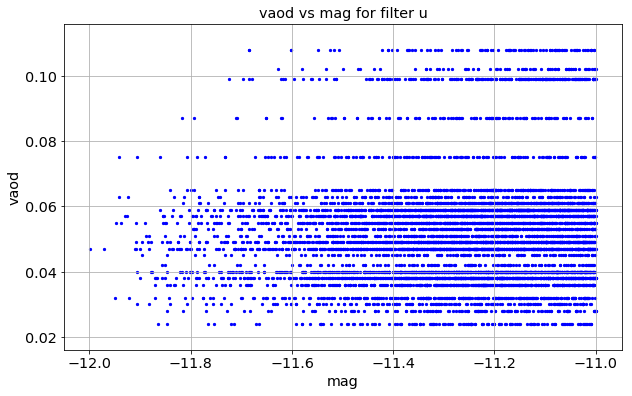

In [88]:
dft.loc[(dft.f == 1) & (dft.mag < -11 )].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter u',color='b',marker='.',grid=True)

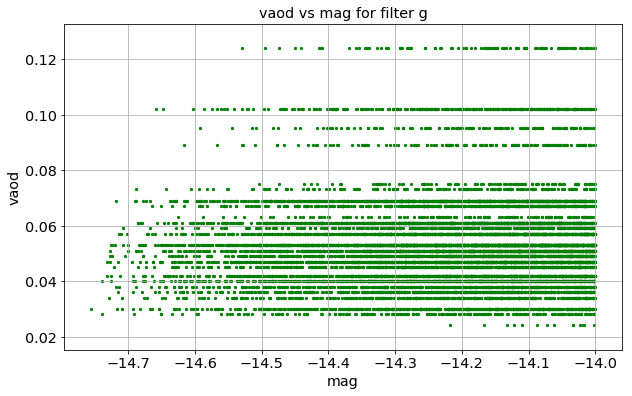

In [89]:
dft.loc[(dft.f == 2) & (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter g',color='g',marker='.',grid=True)

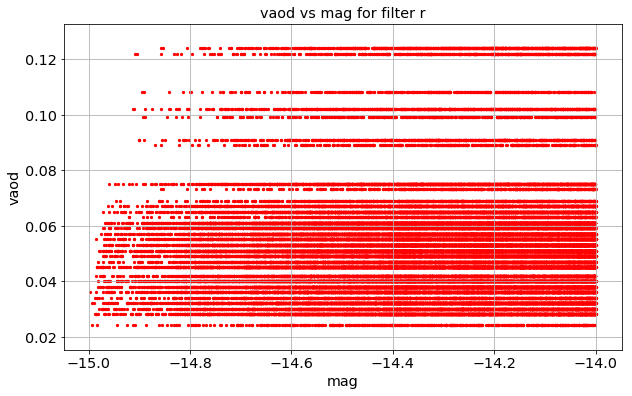

In [90]:
dft.loc[(dft.f == 3) & (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter r',color='r',marker='.',grid=True)

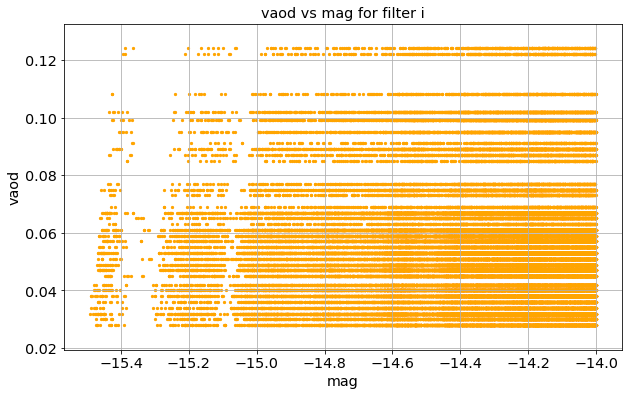

In [91]:
dft.loc[(dft.f == 4)& (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter i',color='orange',marker='.',grid=True)

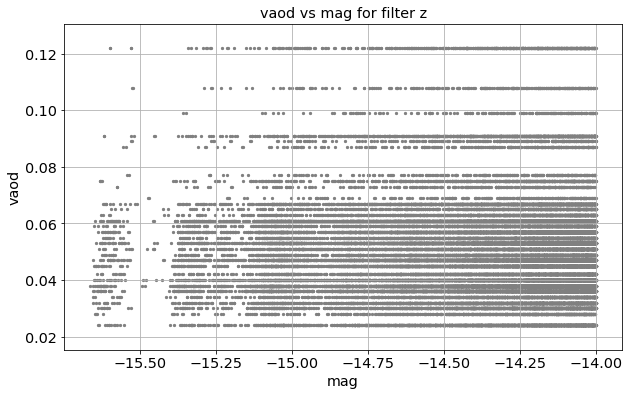

In [92]:
dft.loc[(dft.f == 5) & (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter z',color='grey',marker='.',grid=True)

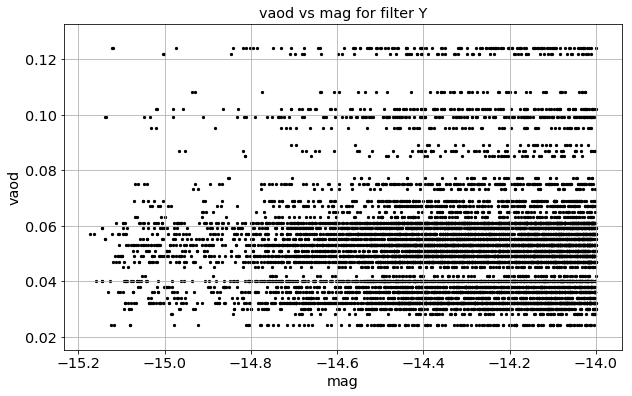

In [93]:
dft.loc[(dft.f == 6) & (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter Y',color='k',marker='.',grid=True)

# Effect of Precipitable water vapor

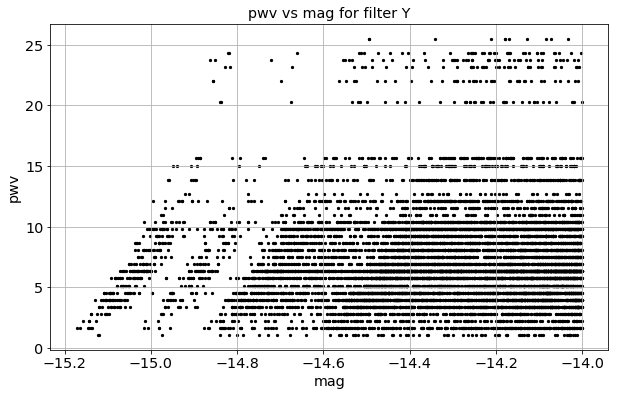

In [94]:
dft.loc[(dft.f == 6) & (dft.mag<-14)].plot.scatter(x='mag',y='pwv',title='pwv vs mag for filter Y',color='k',marker='.',grid=True)